In [1]:

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


sns.set()
plt.style.use('ggplot')

df = pd.read_csv("BreastCancer.csv") # Load the data

In [2]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isnull().sum() # Check for missing values / no missing values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
#msno.bar(df, color="green", figsize=(10,5), fontsize=12, labels=True) # Visualize missing values

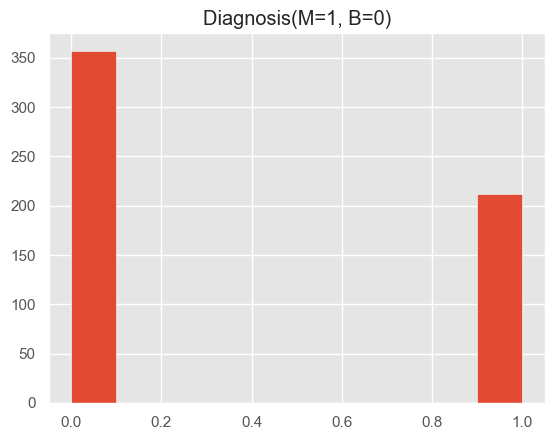

In [6]:
#Visualize the diagnosis as B=Benign=0 and M=Melligant=1
df['diagnosis'] = df['diagnosis'].apply(lambda val:1 if val=='M' else 0)
plt.hist(df['diagnosis'])
plt.title('Diagnosis(M=1, B=0)')
plt.show()

EDA

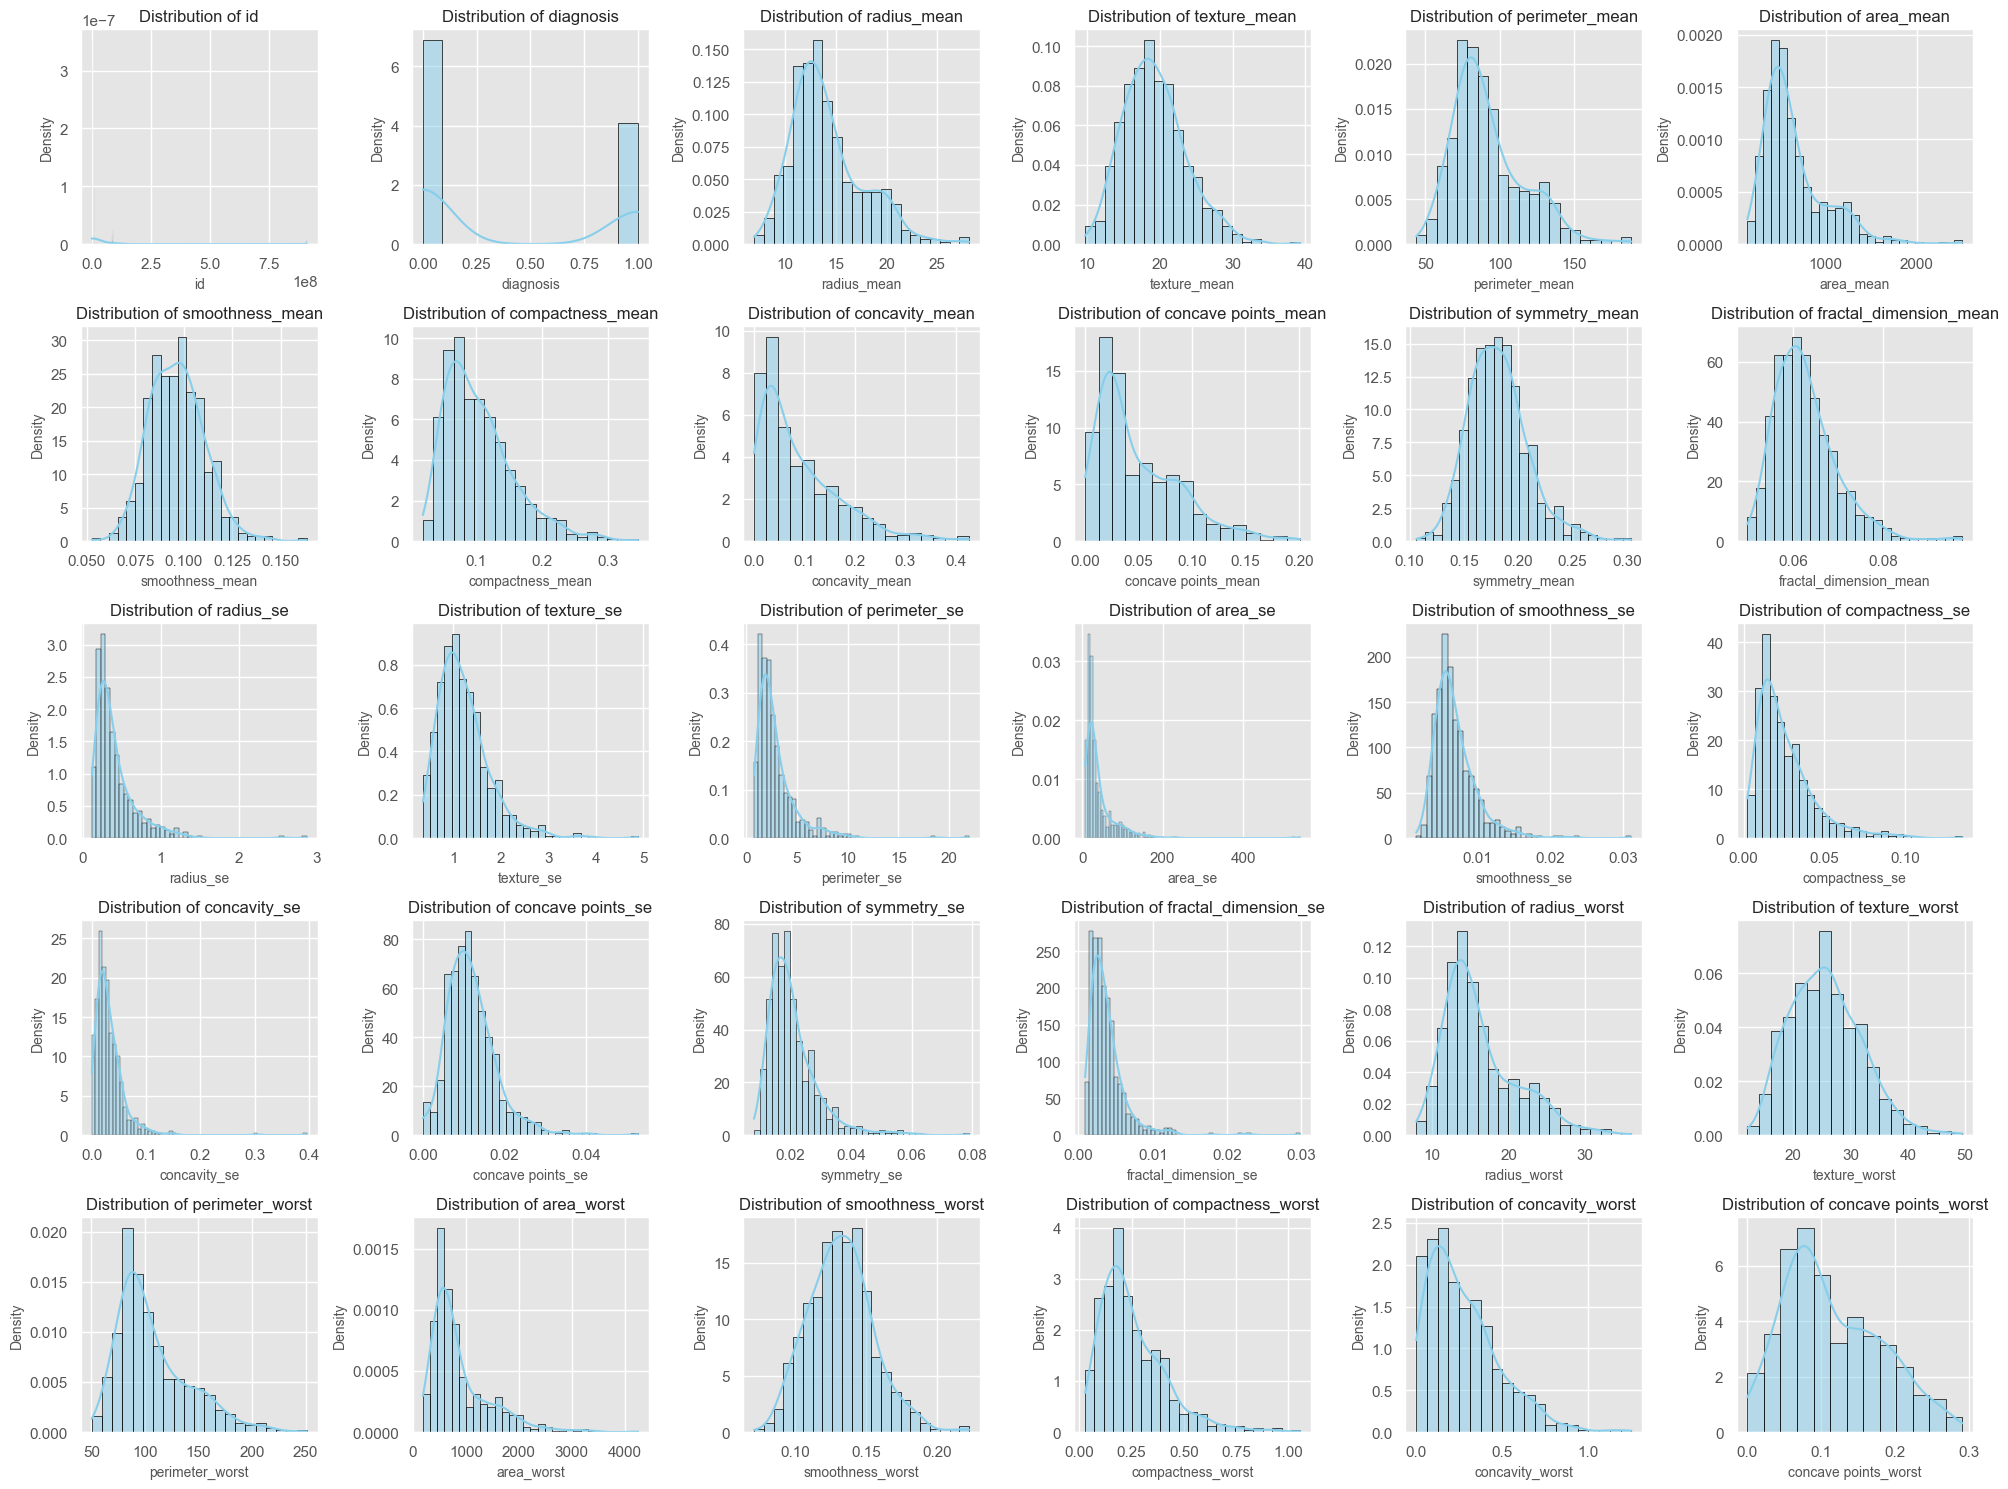

In [7]:
#Displaying the dencity graph 

numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(20, 15))
plotnumber = 1
for column in numeric_columns:
    if plotnumber > 30:
        break   
    ax = plt.subplot(5, 6, plotnumber)
    sns.histplot(
        data=df,
        x=column,
        kde=True,
        stat='density',      
        ax=ax,
        color='skyblue',
        edgecolor='black'
    )
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Density', fontsize=10)  
    plt.title(f'Distribution of {column}', fontsize=12)
    plotnumber += 1
plt.tight_layout()
plt.show()

In [8]:
df.corr() # Correlation matrix

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


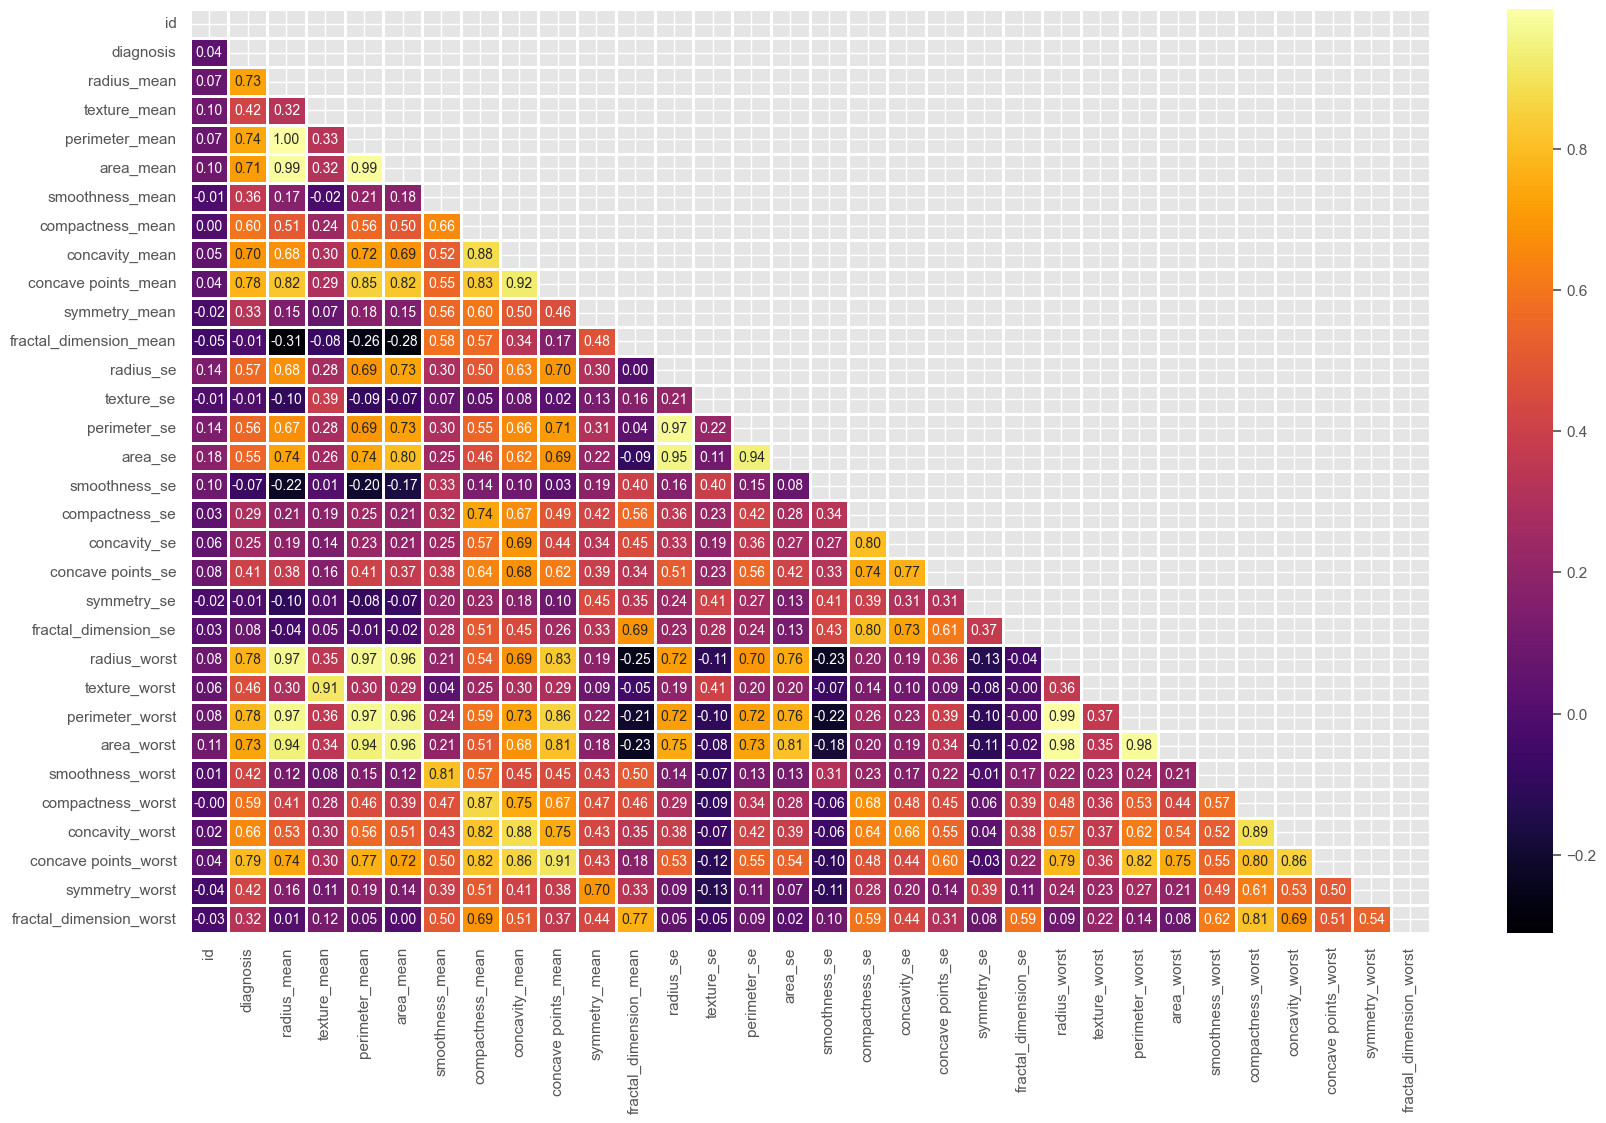

In [9]:
# heatmap
cmap='magma'
plt.figure(figsize=(20,12))
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f", cmap='inferno')
plt.show()

We can see high corelation / multicollinearity
as a result we will drop some columns

In [10]:
# Drop the id column
df.drop('id', axis=1, inplace=True) 

# feature selection /drop columns with high correlation
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]
df = df.drop(to_drop, axis=1)
print(df.shape[1])

# Number of columns/ features after dropping columns with high correlation

23


In [11]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']
X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape
#shape of the dataset 

(455, 22)

In [12]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(y_pred)                                # predicted labels # Shows the model's predictions, allowing you to manually inspect or further analyze the predicted values.
print(accuracy_score(y_train, log_reg.predict(X_train)))        # training accuracy
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))   
print(log_reg_acc)                                              # test accuracy
y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))                         # confusion matrix
print(classification_report(y_test, y_pred))                    # classification report

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0]
0.989010989010989
0.9649122807017544
[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [13]:
#KNN - K-nearest neighbor
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("\npredicted labels\n",y_pred)                                # predicted labels

print("\ntraining accuracy\n",accuracy_score(y_train, knn.predict(X_train)))    # training accuracy
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print("\ntest accuracy\n",knn_acc)                                              # test accuracy                   
y_pred = knn.predict(X_test)
print("\nconfusion matrix\n",confusion_matrix(y_test, y_pred))                  # confusion matrix
print("\nclassification report\n",classification_report(y_test, y_pred))        # classification report


predicted labels
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 1 1 0]

training accuracy
 0.967032967032967

test accuracy
 0.956140350877193

confusion matrix
 [[66  1]
 [ 4 43]]

classification report
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [14]:
# SVC (Support Vector Classifier)

svc= SVC(probability=True)

# Defines a dictionary named parameters containing hyperparameters for the SVC that will be tuned using grid search.
parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],            # defines how far the influence of a single training example reaches.
    'C':[0.01, 0.05, 0.5, 0.1, 1,10, 15,20]         # controls the trade-off between smooth decision boundary and classifying the training points correctly.
}
# performs an exhaustive search over the specified hyperparameter grid to find the best combination based on cross-validation performance.
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)
print("\nbest hyperparameter\n",grid_search.best_params_)                       # Prints the best hyperparameter combination and the corresponding cross-validation score.
print("\ncross-validation score\n",grid_search.best_score_)                          
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("\npredicted labels\n",y_pred)                                            # predicted labels


print("\ntraining accuracy\n",accuracy_score(y_train, svc.predict(X_train)))    # training accuracy
svc_acc = accuracy_score(y_test, svc.predict(X_test))                               
print("\ntest accuracy\n",svc_acc)                                              # test accuracy   
y_pred = svc.predict(X_test)
print("\nconfusion matrix\n",confusion_matrix(y_test, y_pred))                  # confusion matrix
print("\nclassification reportn\n",classification_report(y_test, y_pred))       # classification report


best hyperparameter
 {'C': 15, 'gamma': 0.01}

cross-validation score
 0.9802197802197803

predicted labels
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0]

training accuracy
 0.989010989010989

test accuracy
 0.9824561403508771

confusion matrix
 [[67  0]
 [ 2 45]]

classification reportn
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# Random Forest Classifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 0.5, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)
print("\ntraining accuracy\n",accuracy_score(y_train, rand_clf.predict(X_train)))       # training accuracy
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))                                 
print("\ntest accuracy\n",rand_clf_acc)                                             # test accuracy
y_pred = rand_clf.predict(X_test)
print("\nconfusion matrix\n",confusion_matrix(y_test, y_pred))                         # confusion matrix
print("\nclassification report\n",classification_report(y_test, y_pred))                    # classification report 



training accuracy
 0.9978021978021978

test accuracy
 0.9736842105263158

confusion matrix
 [[66  1]
 [ 2 45]]

classification report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

